# Choosing and Explaining Likely Caravan Insurance Customers


- Family Name: Vanikul
- Given Name: Rajath Akshay

Programming Language: R 3.5.1 in Jupyter Notebook

R Libraries used:
- library(psych), Version 1.8.12 (to describe the features of a dataset)
- library(plyr), Version 1.8.4 (Tools for Splitting, Applying and Combining Data)
- library(caret), Version 6.0.83 (short for Classification And REgression Training)
- library(corrplot), Version 0.84 (Visualization of a Correlation Matrix)
- library(plotrix), Version 3.7-5 (Plotting 3D plots)
- library(ca), Version 3.0.2 (correspondence analysis plots)
- library(e1071), Version 1.7-1 (perform class analysis)
- library(MASS), Version 7.3-51.3 (Modern applied statistics)
- library(leaps), Version 3.0 (Regression subset selection, including exhaustive search)

## Table of Contents

* [Introduction](#sec_1)
* [Data Exploration](#sec_2)
* [Model Development](#sec_3)
* [Model Comparison](#sec_4)
* [Variable Identification and Explanation](#sec_5)
* [Conclusion](#sec_6)
* [References](#sec_7)

## 1. Introduction <a class="anchor" id="sec_1"></a>

The car insurance company is eager to advertise their new caravan insurance policiy scheme to their existing customers. In this task I explore and analyse the customer data collected by the car insurance company and use the extracted knowledge from the analysis to help the company implement a targeted marketing strategy.

The given training data set has 5822 customer records with 86 attributes for each record. These attributes are divided into sociodemographic data (attribute 1-43) and product ownership (attributes 44-86). The sociodemographic data is derived from zip codes which means that these attributes are categorical without order (Nominal), while product ownership can be ranked and is considered ordinal feature. Similarly we have 4000 customer records in test and target data set. attribute 86 in tain and the target dataset is considered to be our target variable.

It is important to create a simple model that best predicts the target. We need to focus on:
* Simple model that minimises the computational cost.
* Explainablility of a model with limited features.
* Model with the best performance.

I have formulated a detailed discription of feature set reduction and explain how exploring certain set of minimal feature can better predict the outcome of our model. This model is then used to approximate 800 potential customers to market the caravan policies. This task includes:
* identifing a subset of attributes that have a significant impact on the customer’s decision of buying a caravan policy.
* development of 3 models to compare and choose the best of it.

Let us now load our datasets:

In [1]:
# reading all the given data sets as a table.
data_train <- read.table("ticdata2000.txt")
data_test <- read.table("ticeval2000.txt")
target <- read.table("tictgts2000.txt")

In [2]:
dim(data_train) #trainig data-set has 5822 records with 86 attributes.

[1] 5822   86

In [3]:
dim(data_test) #test data-set has 4000 records with 85 attributes.(does not include the response variable)

[1] 4000   85

In [4]:
dim(target) #target data-set has 4000 response records.

[1] 4000    1

## 2. Data Exploration<a class="anchor" id="sec_2"></a>

In [5]:
#check for datatype of each feature.
str(data_train)

'data.frame':	5822 obs. of  86 variables:
 $ V1 : int  33 37 37 9 40 23 39 33 33 11 ...
 $ V2 : int  1 1 1 1 1 1 2 1 1 2 ...
 $ V3 : int  3 2 2 3 4 2 3 2 2 3 ...
 $ V4 : int  2 2 2 3 2 1 2 3 4 3 ...
 $ V5 : int  8 8 8 3 10 5 9 8 8 3 ...
 $ V6 : int  0 1 0 2 1 0 2 0 0 3 ...
 $ V7 : int  5 4 4 3 4 5 2 7 1 5 ...
 $ V8 : int  1 1 2 2 1 0 0 0 3 0 ...
 $ V9 : int  3 4 4 4 4 5 5 2 6 2 ...
 $ V10: int  7 6 3 5 7 0 7 7 6 7 ...
 $ V11: int  0 2 2 2 1 6 2 2 0 0 ...
 $ V12: int  2 2 4 2 2 3 0 0 3 2 ...
 $ V13: int  1 0 4 2 2 3 0 0 3 2 ...
 $ V14: int  2 4 4 3 4 5 3 5 3 2 ...
 $ V15: int  6 5 2 4 4 2 6 4 3 6 ...
 $ V16: int  1 0 0 3 5 0 0 0 0 0 ...
 $ V17: int  2 5 5 4 4 5 4 3 1 4 ...
 $ V18: int  7 4 4 2 0 4 5 6 8 5 ...
 $ V19: int  1 0 0 4 0 2 0 2 1 2 ...
 $ V20: int  0 0 0 0 5 0 0 0 1 0 ...
 $ V21: int  1 0 0 0 4 0 0 0 0 0 ...
 $ V22: int  2 5 7 3 0 4 4 2 1 3 ...
 $ V23: int  5 0 0 1 0 2 1 5 8 3 ...
 $ V24: int  2 4 2 2 0 2 5 2 1 3 ...
 $ V25: int  1 0 0 3 9 2 0 2 1 1 ...
 $ V26: int  1 2 5 2 0 

### 2.1 Transforming Ordinal classified features to Nominal features. 

We have train dataset with 5822 records and test dataset with 4000 records of 86 and 85 features respectively. These attributes are divided into These attributes are divided into sociodemographic data (attribute 1-43) and product ownership (attributes 44-86). The sociodemographic data is derived from zip codes which means that these attributes are categorical without order (Nominal), while product ownership can be ranked and is considered ordinal feature.  data (attribute 1-43) and product ownership (attributes 44-86). The sociodemographic data is derived from zip codes which means that these attributes are categorical without order (Nominal), while product ownership can be ranked and is considered ordinal feature. 

Thus, we convert all the sociodemographic data to factors which the model interprets as nominal. Rest of the features are ordinal and can exist in the form of an integer. We perform this step both in test and train.

In [6]:
# iterating through the first 43 features in test and train dataset and trasforming it into factors.

for (i in names(data_train[1:42])){data_train[,i] <- as.factor(data_train[,i])} # converting the tain dataset
for (i in names(data_train[1:42])){data_test[,i] <- as.factor(data_test[,i])} # converting the test dataset

I have trainsformed ordinal features to nominal for further analysis.

Let us now look at different attributes of a all feature. We can make a analyse the range, mean, median, standard deviation (sd), kurtosis value and standard error of each attribute. 
We notice the skewness in each feature, the sign in the skew value demote the direction of skewness (positive -> right skew and negative -> left skew) and maginitude of the skewness is denoted by the value.

In [7]:
# using library(psych)
library(psych)
round(describe(data_train),3)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
V1*,1,5822,23.587,12.415,29,24.276,11.861,1,40,39,-0.419,-1.345,0.163
V2*,2,5822,1.110,0.402,1,1.000,0.000,1,9,8,7.058,88.153,0.005
V3*,3,5822,2.679,0.790,3,2.645,1.483,1,5,4,0.183,0.011,0.010
V4*,4,5822,2.991,0.815,3,2.951,0.000,1,6,5,0.472,0.619,0.011
V5*,5,5822,5.774,2.857,7,5.901,2.965,1,10,9,-0.331,-1.345,0.037
V6*,6,5822,1.696,1.003,1,1.521,0.000,1,10,9,2.237,8.617,0.013
V7*,7,5822,5.627,1.716,6,5.633,1.483,1,10,9,0.074,0.454,0.022
V8*,8,5822,2.070,1.018,2,1.957,1.483,1,6,5,0.902,0.788,0.013
V9*,9,5822,4.259,1.598,4,4.321,1.483,1,10,9,-0.131,-0.032,0.021
V10*,10,5822,7.183,1.909,7,7.328,1.483,1,10,9,-0.719,0.681,0.025


One of the important observations that I have noticed is that most of the mean values of a features between 43 and 86 are close to zero. This shows that the values are not normally distributed across the range. This can also be an indication that these variables are ordinal over nominal category.

This pattern in mean values can be observed better when we use box plot as shown below:

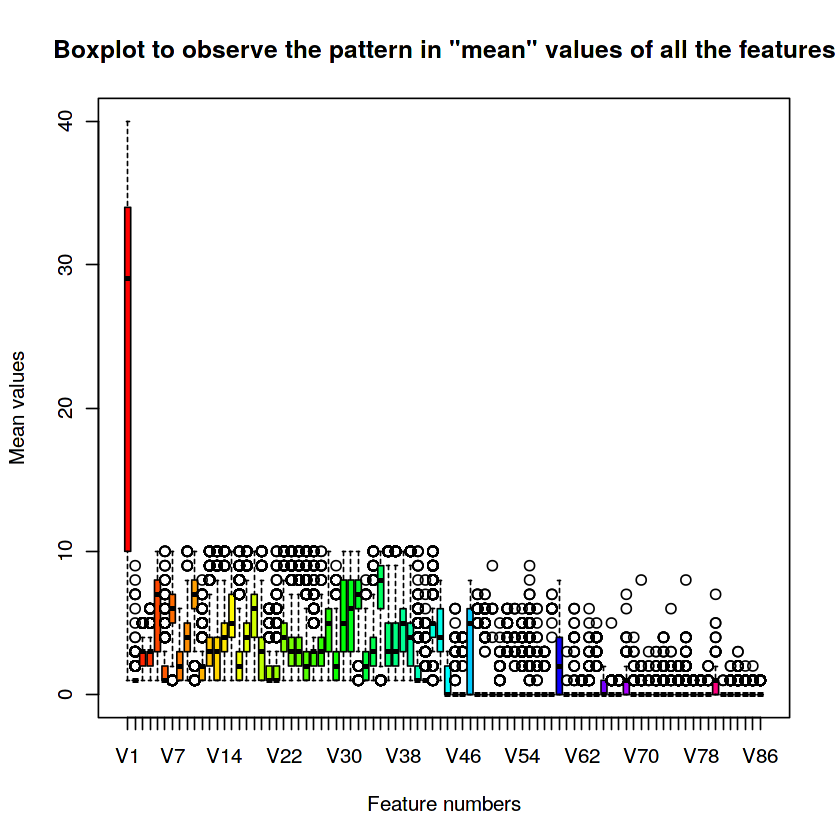

In [8]:
boxplot(data_train,main ="Boxplot to observe the pattern in \"mean\" values of all the features",
        xlab = "Feature numbers",ylab = "Mean values", col = rainbow(length(data_train)))


### 2.2 Distribution of Customer subtype


  1   2   3   4   5   6   7   8   9  10  11  12  13  15  16  17  18  19  20  21 
124  82 249  52  45 119  44 339 278 165 153 111 179   5  16   9  19   3  25  15 
 22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41 
 98 251 180  82  48  50  25  86 118 205 141 810 182 214 225 132 339 328  71 205 

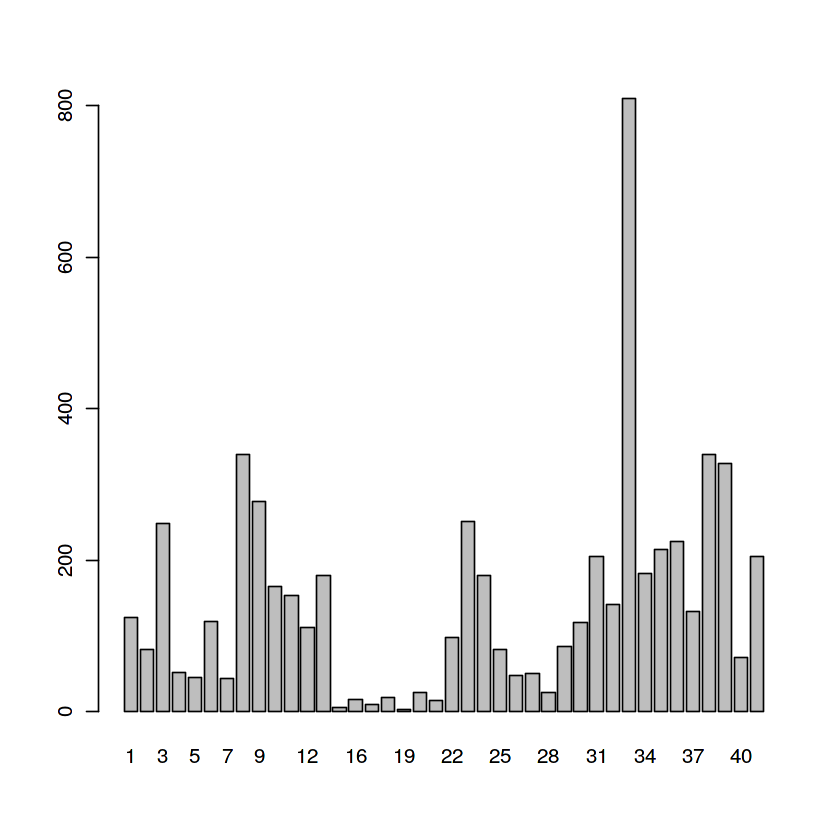

In [9]:
table(data_train$V1) # table view for the first variable
plot(data_train$V1) # plot the frequency for V1

Here, we can notice the dictribution of the first variable(Customer Subtype). We can notice that the 33rd category,(Lower class large families) has about 810 entries which makes it the most common subtype.
Top three customer subtypes are:
1. Lower class large families (category number :33)
2. Middle class families (category number :8)
3. Traditional families (category number :38)

### 2.3 Inspecting Customer Main type

x,freq
1,552
2,502
3,886
4,52
5,569
6,205
7,550
8,1563
9,667
10,276


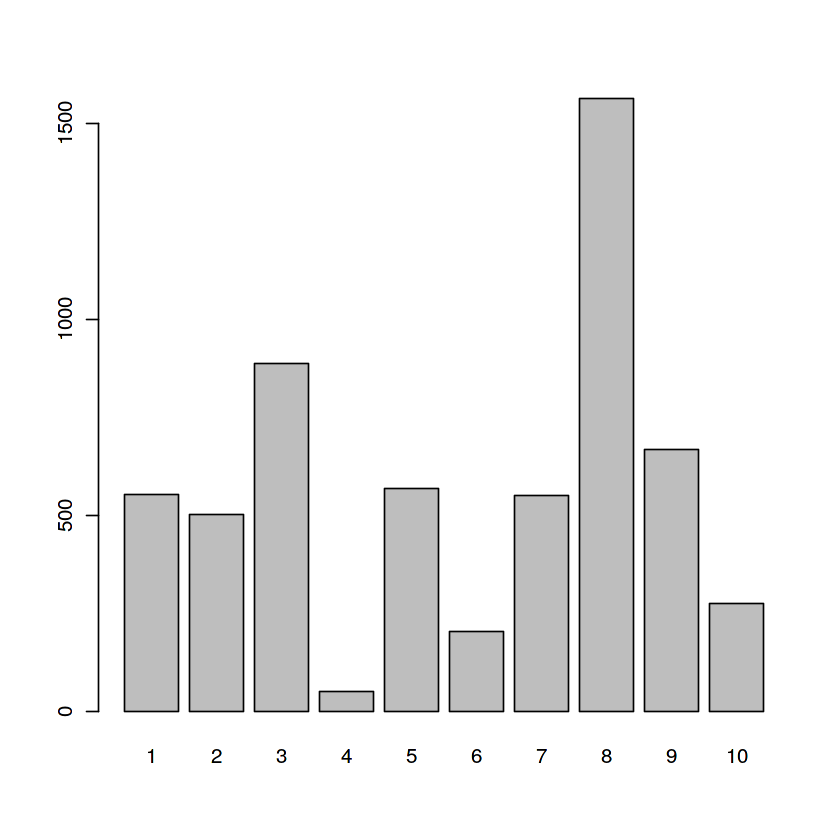

In [10]:
library(plyr)
count(data_train$V5) # count function displayes the frequency of categories
plot(data_train$V5) # plotting the distribution

Here, we can notice the dictribution of the fifth variable(Customer Main type). We can notice that the 8rd category,(Family with grown ups) has about 1563 entries which makes it the most common main type of customers. Top three customer subtypes are:

1. Family with grown ups (category number :8)
2. Average families (category number :3)
3. Conservative families (category number :9)

By comparing the first feature(Customer subtype with 40 categories) and fifth feature(Customer main type with 10 features) we can notice the trend of customers in the data. We can conclude that the customers in the data set is highly towards average household and consevative/traditional families.


### 2.4 Inspecting the response variable (caravan insurence buyers)

x,freq
0,5474
1,348


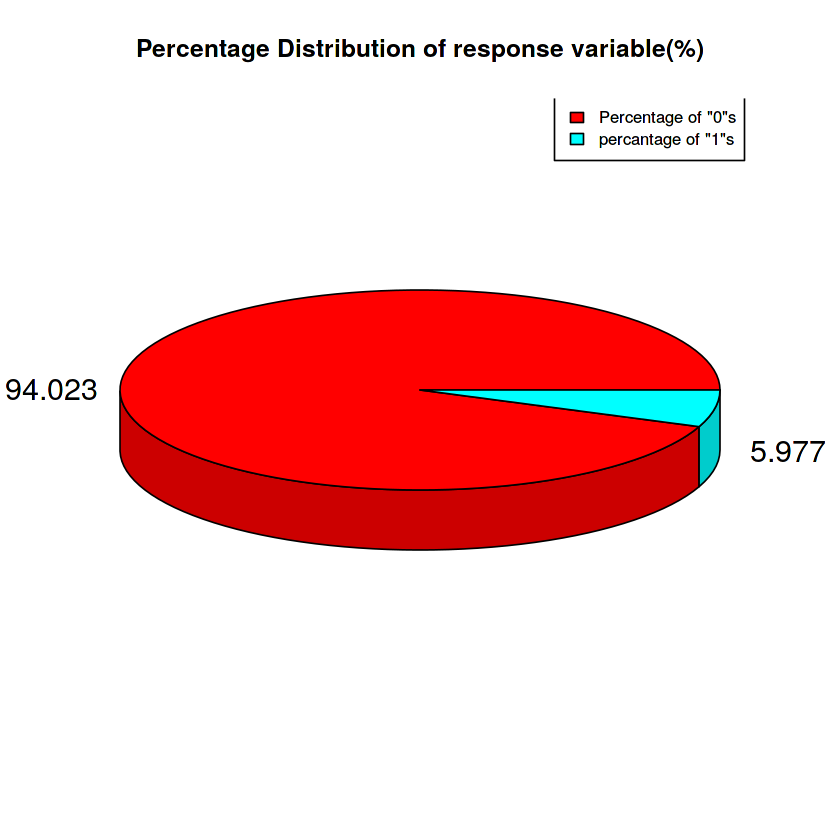

In [33]:
library(plotrix) 
x <-table(data_train$V86) #computing the freq of each category
count(data_train$V86) # displaying the freq of each category
percent <- round(100*x/sum(x),3) # calculating the percentage of each category

# 3D pie plot for response variable
pie3D(table(data_train$V86),labels = percent, main = "Percentage Distribution of response variable(%)",
      col = rainbow(length(x)))
legend("topright",c("Percentage of \"0\"s","percantage of \"1\"s"), cex = 0.8,fill = rainbow(length(x)))


We notice that only a 6% of the customers purchased the caravan insurence policy. We need to consider this while calculating the output prob for our model.

### 2.5 Inspecting correlation of ordinal variables
Here we consider the 44th variable to the last variable. Blue color indicates the positive correlation and red color indicates the negative correlation between the given features in the matrix.

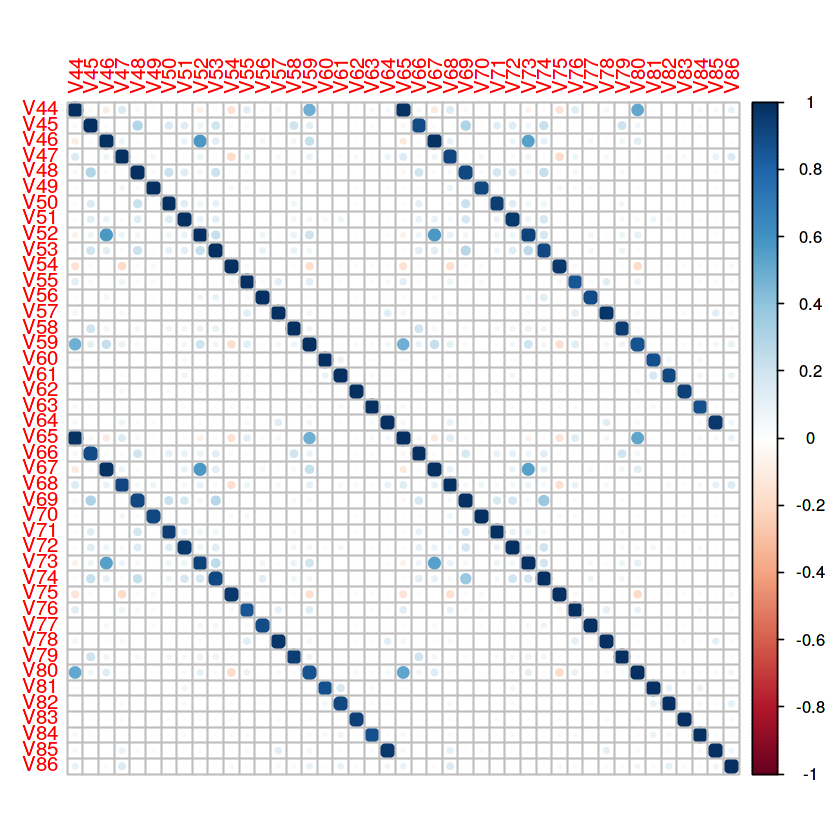

In [34]:
library(corrplot)
corrplot(cor(data_train[44:86]))

Here we notice the positive correlation between features(V65-V85) with features(V44,V64) respectively. We will need to compare these attributes and eliminate one of these during the feature reduction process. 

## 3. Model Development<a class="anchor" id="sec_3"></a>

This section describes the process employed to reduce the feature count and arriving at a model.

### 3.1 Inspecting Near zero variance

This is one of the primary issues to tackle during feature reduction. Identifying constant or almost constant values of a feature. We wish to obtain feature which has some effect on predicting response variable.
Most common and efficient way to find these features is by determining the variance in their values.

Thus, we determine zero or near zero variences using the `nearZeroVar` function in `caret` library. We examine it to cross check the variance to avoid discarding potential features in the dataset.

In [35]:
# using caret library.
library(caret)
nzv <- nearZeroVar(data_train) # determine near zero variance 
nzv

[1] 45 46 48 49 50 51 52 53 54 55 56 57 58 60 61 62 63 64 66 67 69 70 71 72 73
[26] 74 76 77 78 79 81 82 83 84 85

We now inspect the correlation of the features indicated by the function and carefully consider the significant features.

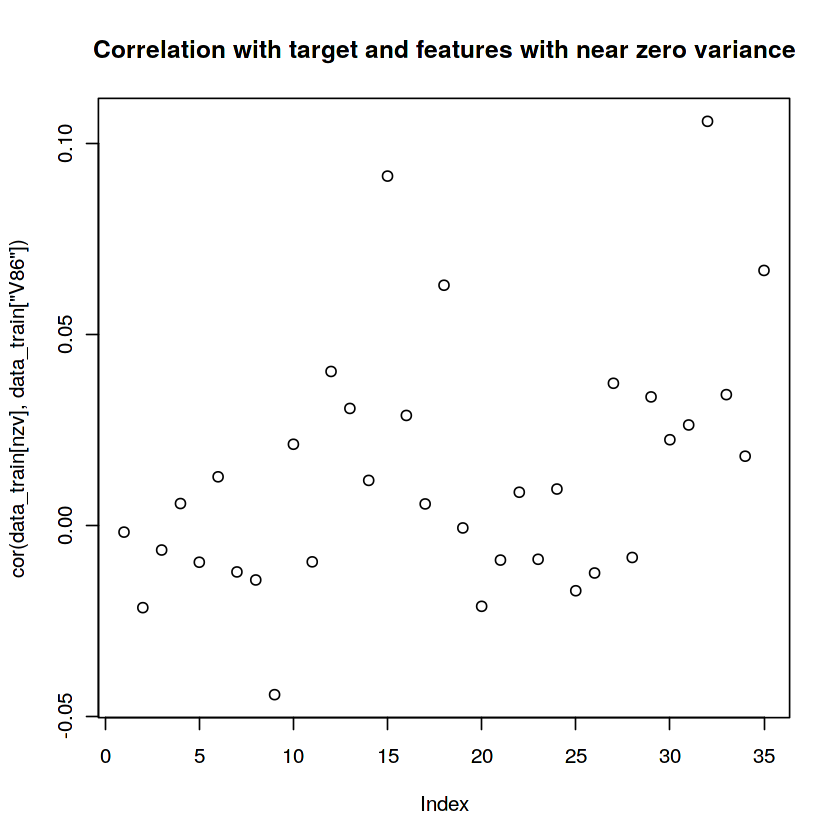

In [36]:
# plotting correlation between response variable and all the other features.
plot(cor(data_train[nzv],data_train['V86'])) 
title(main= "Correlation with target and features with near zero variance")

We have found 4 significant features iin the plot above. We do not wish to discard these features. Thus, filtering out the features which have correlation of more than 0.05 with the response. We have identifies the features to be `V61, V64, V82 and V85`.

Code to perform the same and arive at the variable names are given below:

In [37]:
#filtering all the data points with correlation more than 0.05.
temp = cor(data_train[nzv],data_train['V86']) > 0.05

#determining the exact feature index.
potential_index = which(temp %in% TRUE)
nzv[potential_index]

[1] 61 64 82 85

In [38]:
# inspecting one of the determined features.
# this shows a fair distribution of values among the feature.
count(data_train[64])

V64,freq
0,5740
2,15
3,22
4,44
5,1


In [39]:
# determining rest of the unwanted features to reduce the dataset.
unwanted <- nzv[!nzv %in% nzv[potential_index]]
unwanted # array of index of unwanted features.

[1] 45 46 48 49 50 51 52 53 54 55 56 57 58 60 62 63 66 67 69 70 71 72 73 74 76
[26] 77 78 79 81 83 84

In [40]:
# determining the first training subset after removal of zero and near zero variance feature.
first_subset <- data_train[,-unwanted]

length(first_subset) # print the number of features in first subset.
names(first_subset) # print all the features in first subset.

[1] 55

[1] "V1"  "V2"  "V3"  "V4"  "V5"  "V6"  "V7"  "V8"  "V9"  "V10" "V11" "V12"
[13] "V13" "V14" "V15" "V16" "V17" "V18" "V19" "V20" "V21" "V22" "V23" "V24"
[25] "V25" "V26" "V27" "V28" "V29" "V30" "V31" "V32" "V33" "V34" "V35" "V36"
[37] "V37" "V38" "V39" "V40" "V41" "V42" "V43" "V44" "V47" "V59" "V61" "V64"
[49] "V65" "V68" "V75" "V80" "V82" "V85" "V86"

### 3.2 Correlation between categorical features and response

Since we have nominal and categorical features in our dataset, we can not use pearsons correlation to determine the correlation between the feature set and response variable. Thus, I have used the chi-square test to determine the correlation between our categorical features and the response variable.

Chi-square tests are of two types:
1. chi-square test to determine degree of fit in a model.
2. chi-square test for independence.

Formula for chi square is given by:
![chi_sq](https://www.statisticshowto.datasciencecentral.com/wp-content/uploads/2013/09/chi-square-formula.jpg "Chi-square formula")

[Click here to view the reference](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/chi-square)

We have employed chi-square test to check independence of a feature with respect to the response variable.
Here, we choose variables with low chisquare values which suggests high co-relation with the response variable.

`low chi square value means high corelation between the variables`



In [41]:
# simulating chi-square test for all the features with response variable.
p_values <-mapply(function(x, y) chisq.test(x, y,simulate.p.value=TRUE)$p.value, 
                  first_subset, MoreArgs=list(first_subset[,55]))
p_values

V1           V2           V3           V4           V5           V6 
0.0004997501 0.5412293853 0.0554722639 0.6511744128 0.0004997501 0.3843078461 
          V7           V8           V9          V10          V11          V12 
0.0089955022 0.0439780110 0.0274862569 0.0009995002 0.2823588206 0.0024987506 
         V13          V14          V15          V16          V17          V18 
0.0364817591 0.6551724138 0.2083958021 0.0004997501 0.0289855072 0.0004997501 
         V19          V20          V21          V22          V23          V24 
0.0004997501 0.4807596202 0.0474762619 0.0054972514 0.0014992504 0.0124937531 
         V25          V26          V27          V28          V29          V30 
0.0004997501 0.0279860070 0.8510744628 0.0004997501 0.0119940030 0.0004997501 
         V31          V32          V33          V34          V35          V36 
0.0004997501 0.0004997501 0.9745127436 0.0004997501 0.0044977511 0.0034982509 
         V37          V38          V39          V40          V41          V42 
0.0004997501 0.7201399300 0.0004997501 0.0119940030 0.5392303848 0.0004997501 
         V43          V44          V47          V59          V61          V64 
0.0004997501 0.0004997501 0.0004997501 0.0004997501 0.0004997501 0.0009995002 
         V65          V68          V75          V80          V82          V85 
0.0004997501 0.0004997501 0.0114942529 0.0019990005 0.0004997501 0.0009995002 
         V86 
0.0004997501

[1] 23

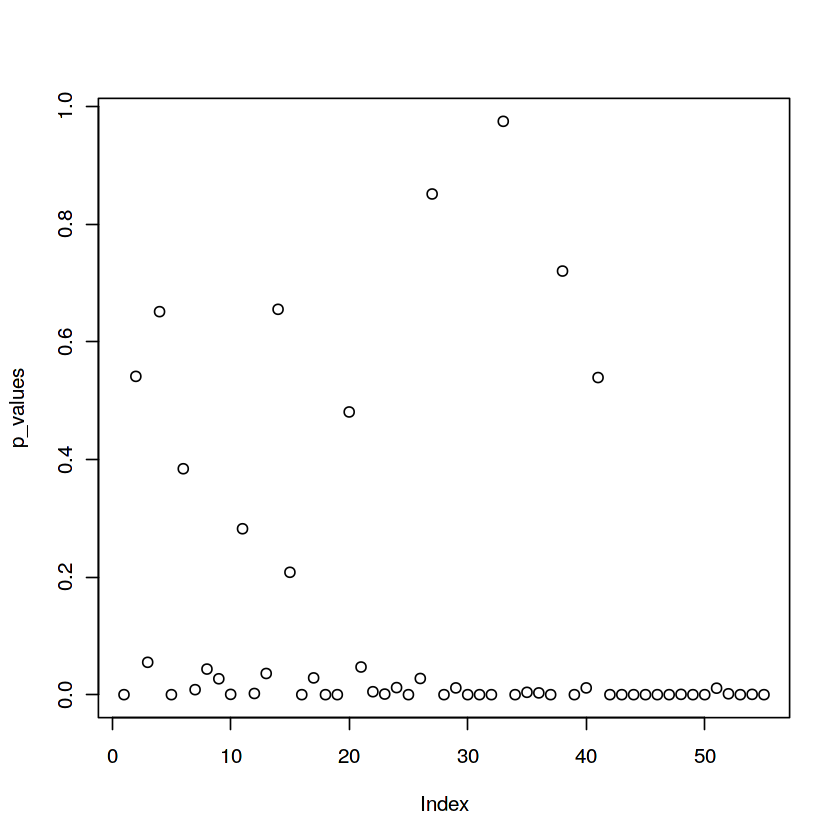

In [42]:
# filtering low values to determine high correlation between features and response variable.
length(p_values[p_values<0.0005])
plot(p_values) # plotting p-values

In [43]:
# determining the feature names which are highly correlated with the response.
imp <- names(p_values[p_values<0.0005])
imp

[1] "V1"  "V5"  "V16" "V18" "V19" "V25" "V28" "V30" "V31" "V32" "V34" "V37"
[13] "V39" "V42" "V43" "V44" "V47" "V59" "V61" "V65" "V68" "V82" "V86"

In [44]:
# filtering out the unwanted element and retaining the importance highly correlated features into a new subset.
unwanted <- which(!colnames(first_subset[,1:42]) %in% imp)
sec_subset <- first_subset[,-unwanted]

length(sec_subset) # print the number of features in second subset.
names(sec_subset) # print all the feature names in second subset.

[1] 27

[1] "V1"  "V5"  "V16" "V18" "V19" "V25" "V28" "V30" "V31" "V32" "V34" "V37"
[13] "V39" "V42" "V43" "V44" "V47" "V59" "V61" "V64" "V65" "V68" "V75" "V80"
[25] "V82" "V85" "V86"

### 3.3 Correlation among ordinal feature 

It is also important for us to determine the correlation among the feature. During our exploration task, we have already noticed positive correlation between features(V65-V85) with features(V44,V64) respectively. We will now inspect if these features still exist. If yes, we will need to eliminate one among these features. 

Code to plot the correlation of ordinal variables are as below:

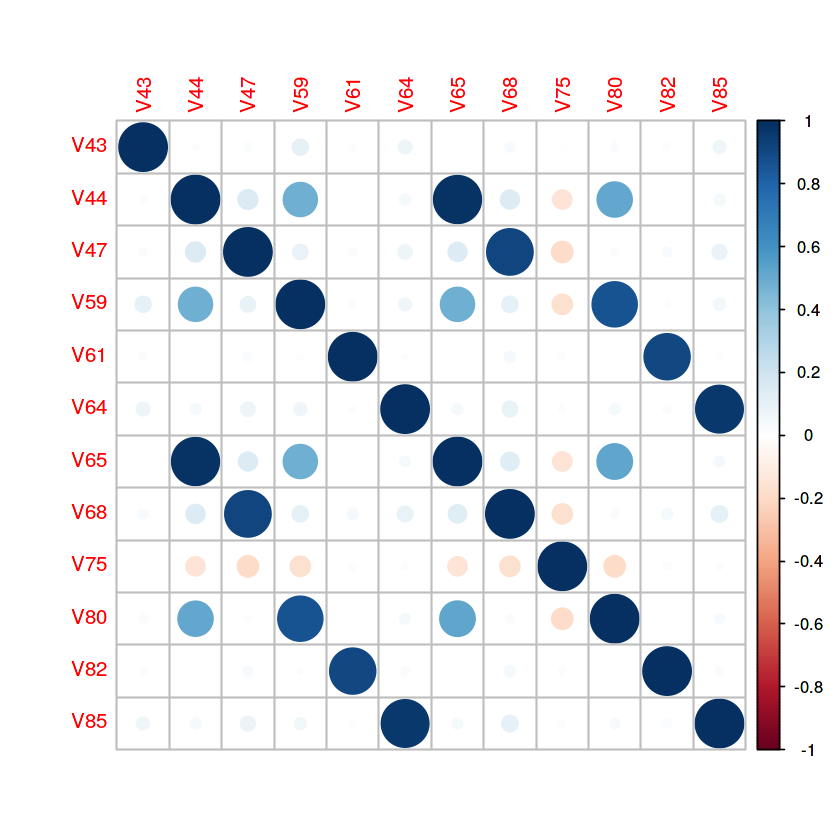

In [45]:
# we just find correlation matrix for the ordinal features
cont <- sec_subset[,15:26]
data_cor <- cor(cont[,-26])
corrplot(data_cor) # plot the correlation matrix

In [46]:
# determine the summary statistics for correlation matrix.
summary(data_cor[upper.tri(data_cor)])

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-0.183236  0.003616  0.032737  0.117261  0.093842  0.981369 

Second step is to determine highly correlated and decide on which variable to retain and which to discard. We have a simple solution to do this, we determine the correlating features and then compare thir mean values and discard the onces with higher mean value.

We can use an existing `findCorrelation` function to determine these features. I have decided to hold the cutoff threshold of 70% in determining the correlation.

Code to perform the same is as below:

In [47]:
# determine all the highly correlated features
highcor_preds <- findCorrelation(data_cor,cutoff = 0.7,verbose = TRUE)
highcor_preds 

Compare row 2  and column  7 with corr  0.981 
  Means:  0.231 vs 0.143 so flagging column 2 
Compare row 4  and column  10 with corr  0.866 
  Means:  0.196 vs 0.13 so flagging column 4 
Compare row 8  and column  3 with corr  0.916 
  Means:  0.173 vs 0.115 so flagging column 8 
Compare row 12  and column  6 with corr  0.966 
  Means:  0.156 vs 0.1 so flagging column 12 
Compare row 11  and column  5 with corr  0.904 
  Means:  0.143 vs 0.085 so flagging column 11 
All correlations <= 0.7 


[1]  2  4  8 12 11

In [48]:
# determine indexes of these features to retain it in our variable
unwanted_index <- which(colnames(cont) %in% rownames(data_cor)[highcor_preds])
unwanted_index <- which(colnames(sec_subset) %in% colnames(cont)[unwanted_index])
unwanted_index # print index of unwanted variables
names(sec_subset[unwanted_index]) # print names of these variables.

[1] 16 18 22 25 26

[1] "V44" "V59" "V68" "V82" "V85"

In [49]:
# create a new subset from the second subset, eliminating the unwanted index.
third_subset <- sec_subset[,-unwanted_index]
length(third_subset) # print number of features in the third subset.
names(third_subset) # print feature names

[1] 22

[1] "V1"  "V5"  "V16" "V18" "V19" "V25" "V28" "V30" "V31" "V32" "V34" "V37"
[13] "V39" "V42" "V43" "V47" "V61" "V64" "V65" "V75" "V80" "V86"

### 3.4 Correspondence Analysis on nominal features

We already know its nearly impossible to determine correlation between nominal(factor) variables. However, we can deploy a similar method to find the relationship between two nomial features. 

*"Correspondence Analysis in R, with Two- and Three-dimensional Graphics: The ca Package"* is the joural written by **'Oleg Nenadi ́c' and 'Michael Greenacre'** suggest that correspondence analysis will help us determine a close similarity, connection, or equivalence among categorical features.

[Reference](https://www.statmethods.net/advstats/ca.html)

According to another [reference](https://www.displayr.com/interpret-correspondence-analysis-plots-probably-isnt-way-think/), correspondence analysis plots can be interpreted as follows:

* This analysis melts the raw data into an object with rows of one feature and columns of another feature.
* The further labels are from the origin, the more discriminating they are.
* The closer labels are to origin, the less distinct they probably are.
* Proximity between column labels and row labels in the plot indicates similarity(high correlation).

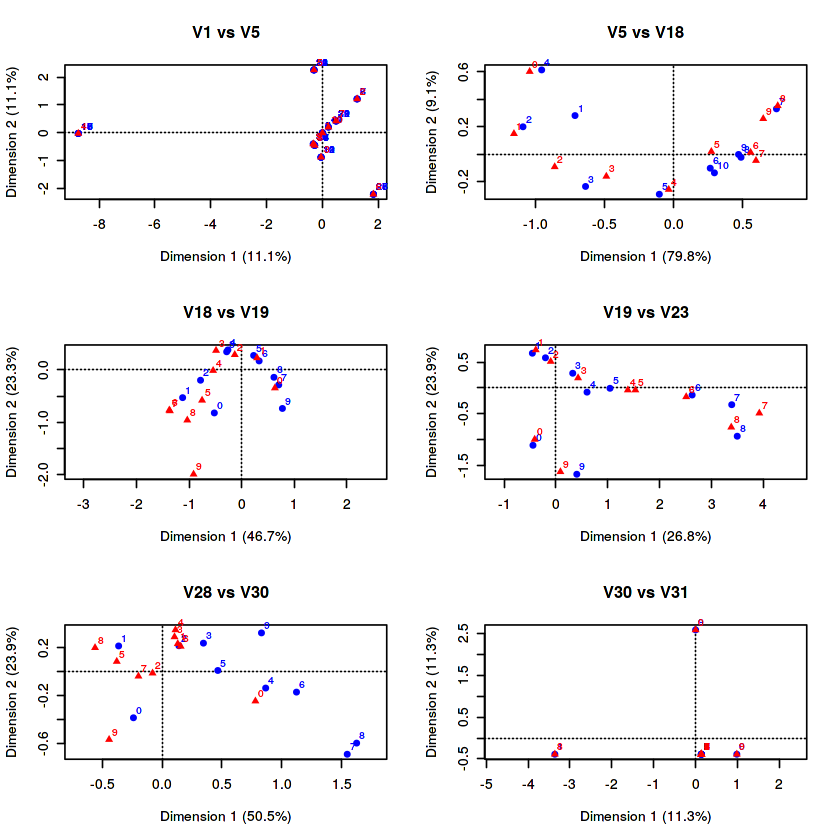

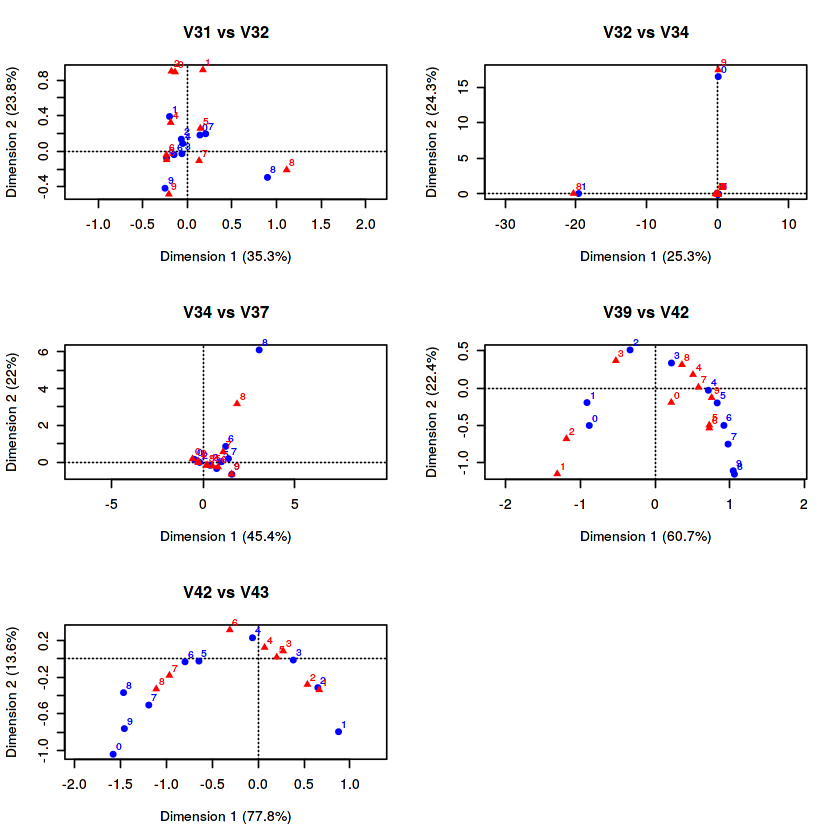

In [50]:
library(ca) # import ca library
#using partitioning for plots
par(mfrow = c(3,2))
mytable <- with(third_subset, table(V1,V5)) # creating a 2 way table
fit <- ca(mytable) # basic results 
# correspondence analysis plot for V1 and V5
plot(fit,main= "V1 vs V5")

# similar code to plot correspondence analysis between all the nominal features in our dataset.
fit = ca(with(third_subset, table(V5,V18)))
plot(fit,main= "V5 vs V18")
fit = ca(with(third_subset, table(V18,V19)))
plot(fit,main= "V18 vs V19")
fit = ca(with(third_subset, table(V19,V25)))
plot(fit,main= "V19 vs V23")
fit = ca(with(third_subset, table(V25,V30)))
plot(fit,main= "V28 vs V30")
fit = ca(with(third_subset, table(V30,V31)))
plot(fit,main= "V30 vs V31")
fit = ca(with(third_subset, table(V31,V32)))
plot(fit,main= "V31 vs V32")
fit = ca(with(third_subset, table(V32,V34)))
plot(fit,main= "V32 vs V34")
fit = ca(with(third_subset, table(V34,V37)))
plot(fit,main= "V34 vs V37")
fit = ca(with(third_subset, table(V39,V42)))
plot(fit,main= "V39 vs V42")
fit = ca(with(third_subset, table(V42,V43)))
plot(fit,main= "V42 vs V43")

After carefully analysis the plots above, We can notice the following:
* Features `V1-V5`,`V1-V32`, `V34-V37` show slogging at the origin which suggests that the features are not discriminating but are similar.
* However, all the features show low proximity between columns and rows which suggest the high chances for correlating data. 

Since all the features show high corelation between among each other, we can conclude that features with dimension percentage over 75% can be a great feature to consider.

Thus, We consider features `V5` and `V43` for further analysis.

In [51]:
# creating the fourth subset.
fourth_subset <- third_subset[c('V5','V43','V47','V61','V65','V64','V75','V80','V86')]
length(fourth_subset) # print the number of features in fourth subset.
names(fourth_subset) # print all the feature names.

[1] 9

[1] "V5"  "V43" "V47" "V61" "V65" "V64" "V75" "V80" "V86"

### 3.5 Stepwise selection

Stepwise selection is a part of stepwise regression which is a method of fitting regression models in which the choice of predictive features are carried out by an automatic procedure. We use this predictive feature selection to validate and reduce the set of features in our model.

We use the `forward stepwise approach` for feature selection in our task. we validate the dummy variables generated by nominal variables and decide on the final subset.

Code to perform these steps are as below:

In [52]:
# use of regsubset function to perform forward selection process.
library(leaps)
regfit.full <- regsubsets(V86~., data = fourth_subset,nvmax =10 ,method = "forward")
reg.summary <- summary(regfit.full)
reg.summary # print the summary of the fit.

Subset selection object
Call: regsubsets.formula(V86 ~ ., data = fourth_subset, nvmax = 10, 
    method = "forward")
16 Variables  (and intercept)
     Forced in Forced out
V52      FALSE      FALSE
V53      FALSE      FALSE
V54      FALSE      FALSE
V55      FALSE      FALSE
V56      FALSE      FALSE
V57      FALSE      FALSE
V58      FALSE      FALSE
V59      FALSE      FALSE
V510     FALSE      FALSE
V43      FALSE      FALSE
V47      FALSE      FALSE
V61      FALSE      FALSE
V65      FALSE      FALSE
V64      FALSE      FALSE
V75      FALSE      FALSE
V80      FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: forward
          V52 V53 V54 V55 V56 V57 V58 V59 V510 V43 V47 V61 V65 V64 V75 V80
1  ( 1 )  " " " " " " " " " " " " " " " " " "  " " "*" " " " " " " " " " "
2  ( 1 )  " " " " " " " " " " " " " " " " " "  "*" "*" " " " " " " " " " "
3  ( 1 )  " " " " " " " " " " " " " " " " " "  "*" "*" "*" " " " " " " " "
4  ( 1 )  " " " " " " " " " " " " " " " " " "  "*"

Now we use cp mallow, BIC(Bayesian information criterion), adjusted R-sq and RSS(residual sum-of-squares) of the model to determine the best optimal subset. We have a plot of each to show the significant number of features. 

We choose BIC for our analysis because Bayesian information criterion ususally penalises the features more to gain better model fit.

[1] 6

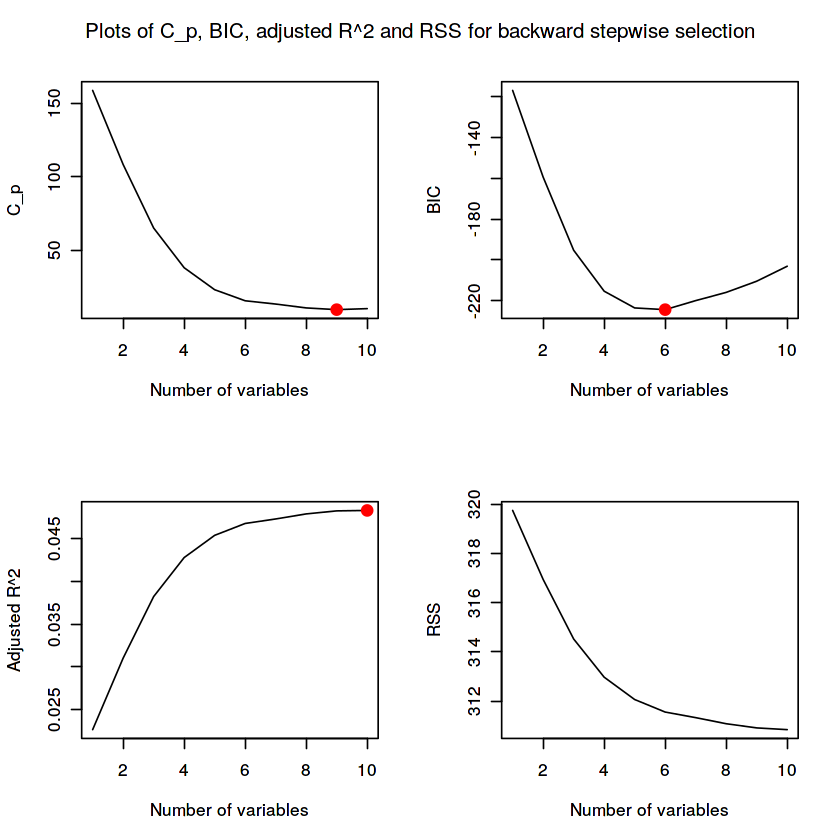

In [53]:
# plot of cp mallow, BIC(Bayesian information criterion), adjusted R-sq and RSS(residual sum-of-squares) of the model

par(mfrow = c(2, 2))
# plot for cp
plot(reg.summary$cp, xlab = "Number of variables", ylab = "C_p", type = "l")
points(which.min(reg.summary$cp), reg.summary$cp[which.min(reg.summary$cp)], col = "red", cex = 2, pch = 20)
#plot for BIC
plot(reg.summary$bic, xlab = "Number of variables", ylab = "BIC", type = "l")
points(which.min(reg.summary$bic), reg.summary$bic[which.min(reg.summary$bic)], col = "red", cex = 2, pch = 20)
#plot for adjusted R-sq
plot(reg.summary$adjr2, xlab = "Number of variables", ylab = "Adjusted R^2", type = "l")
points(which.max(reg.summary$adjr2), reg.summary$adjr2[which.max(reg.summary$adjr2)], col = "red", cex = 2, pch = 20)
#plot for RSS
plot(reg.summary$rss, xlab = "Number of variables", ylab = "RSS", type = "l")
mtext("Plots of C_p, BIC, adjusted R^2 and RSS for backward stepwise selection", side = 3, line = -2, outer = TRUE)

# return the minimum number of feature for the model
minbic = which.min(reg.summary$bic)
minbic

In [54]:
# inspecting the optimal number of features and their coefficients.
coef(regfit.full, minbic)

(Intercept)          V52          V43          V47          V61          V65 
-0.023505141  0.047871285  0.007389493  0.010840875  0.074387713  0.032615415 
         V64 
 0.023034591

In [55]:
# create a fifth subset to store the final filetered attributes
fifth_subset <- fourth_subset[c('V43','V47','V61','V65','V64','V86')]
fifth_subset$V86 <- as.factor(fifth_subset$V86)
length(fifth_subset) # print the number of features in fourth subset.
names(fifth_subset) # print all the festure names.

[1] 6

[1] "V43" "V47" "V61" "V65" "V64" "V86"

### 3.6 Creating test and train sets from our training set.
This is an essential process to train and cross-validate the model

In [56]:
# data partitioning using "createDataPartition" function.
inTrain <- createDataPartition(fifth_subset$V86, p = 0.80, list = FALSE)
train <- fifth_subset[inTrain,] # train data
test <- fifth_subset[-inTrain,] # test data

count(train$V86) # freq for train
count(test$V86) # freq for test

x,freq
0,4380
1,279


x,freq
0,1094
1,69


### 3.7 Validating the final feature set

I have decided to use `logictic regression` to check the performance of the model.

In [57]:
# fitting the dataset in logistic regression
logit<- train(V86~., data=train, method='glm', family=binomial(link='logit'), preProcess=c('scale', 'center'))
summary(logit) #summary of the fit


Call:
NULL

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5546  -0.3981  -0.2863  -0.1921   3.0100  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.06787    0.08002 -38.339  < 2e-16 ***
V43          0.35907    0.06346   5.658 1.53e-08 ***
V47          0.65992    0.07659   8.616  < 2e-16 ***
V61          0.16455    0.03133   5.252 1.51e-07 ***
V65          0.22257    0.06265   3.553 0.000381 ***
V64          0.09401    0.03860   2.435 0.014877 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2111.9  on 4658  degrees of freedom
Residual deviance: 1925.4  on 4653  degrees of freedom
AIC: 1937.4

Number of Fisher Scoring iterations: 6


In [58]:
library(e1071)
# predicting the test dataset with the trained model
pred <- predict(logit,test[-86])
# creating a confusion matrix to analyse the outcome.
confusionMatrix(table(pred,test$V86))

Confusion Matrix and Statistics

    
pred    0    1
   0 1092   69
   1    2    0
                                         
               Accuracy : 0.939          
                 95% CI : (0.9236, 0.952)
    No Information Rate : 0.9407         
    P-Value [Acc > NIR] : 0.6281         
                                         
                  Kappa : -0.0034        
 Mcnemar's Test P-Value : 4.773e-15      
                                         
            Sensitivity : 0.9982         
            Specificity : 0.0000         
         Pos Pred Value : 0.9406         
         Neg Pred Value : 0.0000         
             Prevalence : 0.9407         
         Detection Rate : 0.9390         
   Detection Prevalence : 0.9983         
      Balanced Accuracy : 0.4991         
                                         
       'Positive' Class : 0              
                                         

### 3.8 Check for Multicollinearity 

Cross checking for correlations only among pairs of predictors. One of the mode widely used methods is called variance inflation factors (VIF). Basically, variance inflation factors is the factor of a predictor by which the variance is inflated.

Its commonly known for a predictor with VIF value more than 4 to be discarded as a valid predictor.

[Please click here to view reference](https://newonlinecourses.science.psu.edu/stat501/node/347/)

In [60]:
library(car)
vif(logit$finalModel) # determine the VIF of the predictor.

V43      V47      V61      V65      V64 
1.011255 1.021650 1.002501 1.020270 1.017802

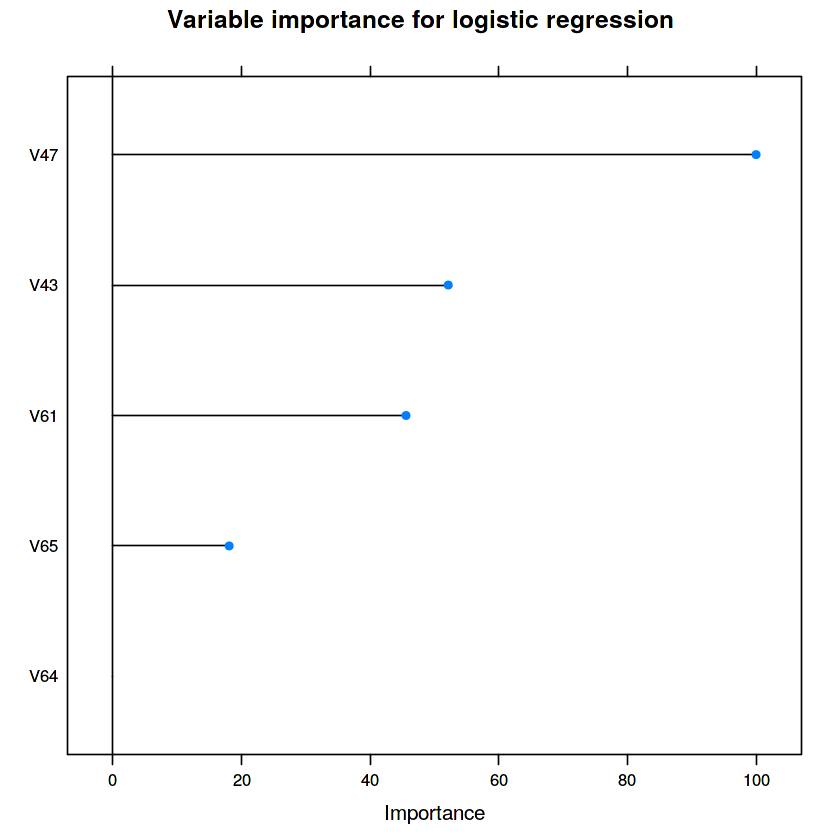

In [61]:
# plot for variable importance
# shows the important features of the model and measure of importance
plot(varImp(logit, scale = TRUE), main = "Variable importance for logistic regression")

## 4. Model Comparsion<a class="anchor" id="sec_4"></a>

In this section, I will be comparing following models on the test dataset and evaluate which model best fits the data.
I will be implementing all the three predictive analysis methods below:
1. Logistic Regression Model
2. Linear Discriminant Analysis Model
3. Naive Bayes classifier

### 4.1 Logistic Regression Model
First we will implement logistic regression.

In [62]:
# fitting the dataset in logistic regression
logit<- train(V86~., data=fifth_subset, method='glm', family=binomial(link='logit'), preProcess=c('scale', 'center'))

summary(logit) #summary of the fit


Call:
NULL

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.454  -0.396  -0.277  -0.185   3.044  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.09148    0.07282 -42.456  < 2e-16 ***
V43          0.37686    0.05684   6.631 3.34e-11 ***
V47          0.67214    0.06933   9.695  < 2e-16 ***
V61          0.14711    0.02837   5.186 2.15e-07 ***
V65          0.26968    0.05644   4.778 1.77e-06 ***
V64          0.07694    0.03537   2.175   0.0296 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2635.5  on 5821  degrees of freedom
Residual deviance: 2394.3  on 5816  degrees of freedom
AIC: 2406.3

Number of Fisher Scoring iterations: 6


**In the output above:**
* Examining Deviance residual - We can conclude that the distribution is right skewed because of the values under max,min and median.
* Coefficicients - shows the change in log odds for every unit change in a feature. example, for every unit change in feature V43(purchasing power class), the reponse variable is increased by 0.37686.
* Significance is given by stars and p-value. according to our output, All the predictors except V64 is highly significant. V64(Contribution social security insurance policies) is comparitively less significant than others.

We can also obtain confidence intervals of all the features in the model with the function `confint`. We can seen that the confidence interval of V43(purchasing power class) is between 0.266 and 0.489. which means that over 95% of the V43(purchasing power class) data lies within the given range of (0.266, 0.489).
Similarly, we can note confidence interval for other features.

In [63]:
# below is the details about the confidence interval and co-efficients of features.
cbind(coef= coef(logit$finalModel), confint(logit$finalModel))

Waiting for profiling to be done...


,coef,2.5 %,97.5 %
(Intercept),-3.09147988,-3.238302640,-2.9525917
V43,0.37685974,0.265837186,0.4887491
V47,0.67213782,0.539179552,0.8113340
V61,0.14710874,0.089529130,0.2022872
V65,0.26967874,0.159349141,0.3807765
V64,0.07694204,0.003513405,0.1431667


Let us now determine how well our model is predicting compared to intercept alone. For this interpretation, we make use of the existing model summary and examine chiq-square value, degree of freedom and associated p-value of the model. 

As we can notice,
Our model has yielded a chi-square of 241.22 with 5 degrees of freedom and an associated p-value of less than 4.21e-50 suggests that our model is significantly better than an empty model. This is sometimes called a likelihood ratio test (the deviance residual is -2*log likelihood).

In [64]:
with(logit$finalModel, null.deviance - deviance)
with(logit$finalModel, df.null - df.residual)
with(logit$finalModel, pchisq(null.deviance - deviance, df.null - df.residual, lower.tail = FALSE))

[1] 241.2169

[1] 5

[1] 4.209626e-50

In [65]:
anova(logit$finalModel, test = "Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,5821,2635.540,NA
V43,1,52.905079,5820,2582.635,3.500631e-13
V47,1,139.334258,5819,2443.301,3.722189e-32
V61,1,20.697311,5818,2422.604,5.379148e-06
V65,1,24.086149,5817,2398.518,9.212053e-07
V64,1,4.194067,5816,2394.324,4.056566e-02


The output of anova test which uses chi-square test shows p-value for each feature in the model. Observing the output above we can conclude that feature V47(Contribution car policies) has the most significance towards predicting the response. Which is followed by V43(Purchasing power class), V65(Number of private third party insurance), V61(Contribution boat policies) and V64(Contribution social security insurance policies) respectively.

Below is a predict function which predicts the output of a test dataset using the trained logistic regression model. We are using confusion matrix to compare the predicted output with the target variable and determine model performance.
Code to perform this operation is as below:

In [66]:
pred <- predict(logit,data_test)
confusionMatrix(table(pred,target$V1))

Confusion Matrix and Statistics

    
pred    0    1
   0 3759  236
   1    3    2
                                          
               Accuracy : 0.9402          
                 95% CI : (0.9325, 0.9474)
    No Information Rate : 0.9405          
    P-Value [Acc > NIR] : 0.5438          
                                          
                  Kappa : 0.014           
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.999203        
            Specificity : 0.008403        
         Pos Pred Value : 0.940926        
         Neg Pred Value : 0.400000        
             Prevalence : 0.940500        
         Detection Rate : 0.939750        
   Detection Prevalence : 0.998750        
      Balanced Accuracy : 0.503803        
                                          
       'Positive' Class : 0               
                                          

- We see the accuracy of our logistic model is 94.02% which is good. However, we need to note other significant paramenters.
- No information rate: the largest proportion of the observed classes is about 0.94.
- P-Value: A hypothesis test is also computed to evaluate whether the overall accuracy rate is greater than the rate of the largest class. Our model computes the P-value of 2e-16 which proves to be very significant model.
- Sensitivity: ability of a model to identify true positives. Our model pocesses a sensitivity of 0.99 which is really good true positive rate where our ideal rate would be 1. 
- Specificity: ability of a model to identify true negatives. Our model pocesses a specificity of 0.008 which is again a sign of good specificity, where the ideal rate of true negatives for a model should be 0.

### 4.2 Linear Discriminant Analysis Model

Now, we will carry out LDA on the test dataset.

Call:
lda(V86 ~ ., data = fifth_subset)

Prior probabilities of groups:
         0          1 
0.94022673 0.05977327 

Group means:
       V43      V47        V61       V65       V64
0 4.187797 2.859335 0.01260504 0.3918524 0.0411034
1 5.000000 4.718391 0.11781609 0.5775862 0.1494253

Coefficients of linear discriminants:
          LD1
V43 0.2110377
V47 0.2202534
V61 1.5146945
V65 0.6669768
V64 0.4996928

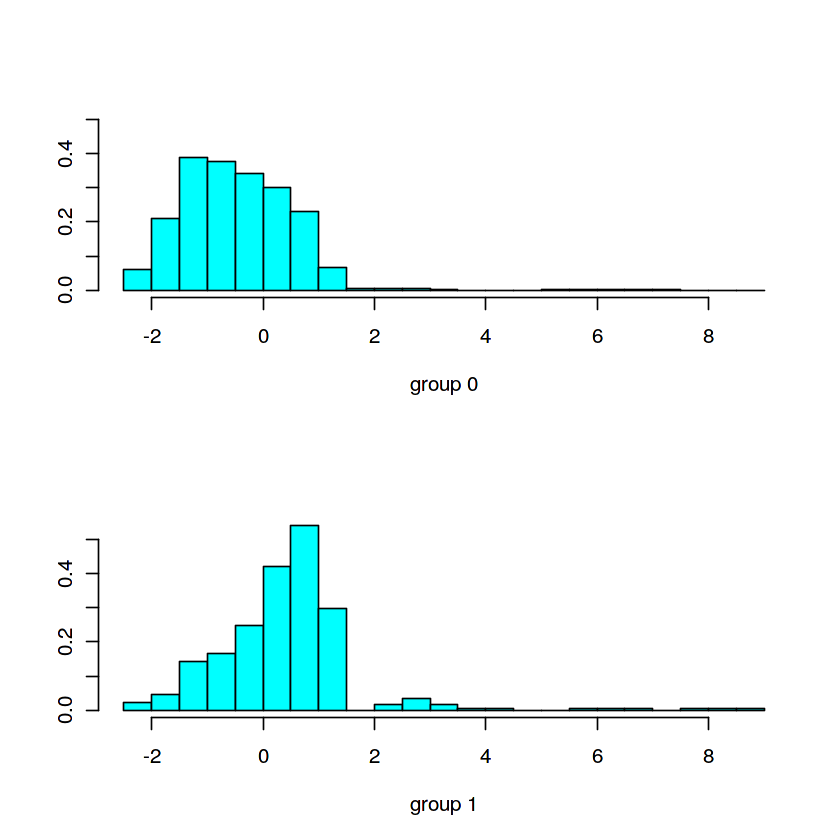

In [67]:
library(MASS) # using MASS library to call LDA function.
lda_test = lda(V86~., data = fifth_subset) # training the LDA model
lda_test
plot(lda_test) # plot of LDA model

Observing the output of the LDA trained model, We can interpret that the feature V61(Contribution boat policies) with coefficient of 1.52 has better predicting ability over others. Coefficients with higher value(away from 0) means better predictor for the model. V61 is followed by V65(Number of private third party insurance),V64(Contribution social security insurance policies), V47(Contribution car policies), V43(Purchasing power class) respectively.

Observing our LDA graph gives a relative significant difference when predicting '0' and '1'. Although the division isn't significant in the distribution, we can observe the fine pattern division between the distribution of the graph.

Below is a predict function which predicts the output of a test dataset using the trained LDA model. We are using confusion matrix to compare the predicted output with the target variable and determine model performance.
Code to perform this operation is as below:

In [68]:
pred<- predict(lda_test, data_test)
confusionMatrix(table(target$V1, pred$class))

Confusion Matrix and Statistics

   
       0    1
  0 3755    7
  1  233    5
                                          
               Accuracy : 0.94            
                 95% CI : (0.9322, 0.9472)
    No Information Rate : 0.997           
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.0345          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.94157         
            Specificity : 0.41667         
         Pos Pred Value : 0.99814         
         Neg Pred Value : 0.02101         
             Prevalence : 0.99700         
         Detection Rate : 0.93875         
   Detection Prevalence : 0.94050         
      Balanced Accuracy : 0.67912         
                                          
       'Positive' Class : 0               
                                          

- Accuracy of our LDA model is 94% which is good. However, we need to note other significant paramenters.
- No information rate: the largest proportion of the observed classes is about 0.997.
- P-Value: A hypothesis test is also computed to evaluate whether the overall accuracy rate is greater than the rate of the largest class. Our model computes the P-value of 2e-16 which proves to be very significant model.
- Sensitivity: ability of a model to identify true positives. Our model pocesses a sensitivity of 0.94 which is really good true positive rate where our ideal rate would be 1. 
- Specificity: ability of a model to identify true negatives. Our model pocesses a specificity of 0.42 which is not a great specificity value for a model, where the ideal rate of true negatives for a model should be 0.

**LDA model isnt identifying true-negatives as well as logistic regression.** 



.


### 4.3 Naive Bayes classifier

Since we know that the features are categorical, we would hope Naive Bayes model to outperform all the above models. We shall now train our model and test it to access the performance of the model.

In [69]:
library(e1071) # using the library to train naiveBayes model
nB<- naiveBayes(V86~.,data=fifth_subset)
nB


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
         0          1 
0.94022673 0.05977327 

Conditional probabilities:
   V43
Y       [,1]     [,2]
  0 4.187797 1.997301
  1 5.000000 2.010061

   V47
Y       [,1]     [,2]
  0 2.859335 2.914510
  1 4.718391 2.421328

   V61
Y         [,1]      [,2]
  0 0.01260504 0.2221641
  1 0.11781609 0.6793995

   V65
Y        [,1]      [,2]
  0 0.3918524 0.4904490
  1 0.5775862 0.4946549

   V64
Y        [,1]      [,2]
  0 0.0411034 0.3817870
  1 0.1494253 0.7045138


Naive Bayse output gives us the probabilities of the even occuring independent of the other features and events. Observing our output we determine that 
* The probability of the response prediction of '0' is 0.94 and '1' is 0.06. 
* The conditional prob for V43(Purchasing power class) is 5 and 2 for the positive response variable.
* The conditional prob for V47(Contribution car policies) is 4.7 and 2.4 for the positive response variable.
* The conditional prob for V61(Contribution boat policies) is 0.12 and 0.67 for the positive response variable.
* The conditional prob for V65(Number of private third party insurance) is .58 and .5 for the positive response variable.
* The conditional prob for V64(Contribution social security insurance policies)is .15 and .7 for the positive response variable.

These above mentioned features show the order of conditional probablities which inturn suggests their significance.

Below is a predict function which predicts the output of a test dataset using the trained Naive Bayes model. We are using confusion matrix to compare the predicted output with the target variable and determine model performance.
Code to perform this operation is as below:

In [70]:
pred <- predict(nB,test[-86])

confusionMatrix(table(pred,test$V86))

Confusion Matrix and Statistics

    
pred    0    1
   0 1073   65
   1   21    4
                                          
               Accuracy : 0.9261          
                 95% CI : (0.9095, 0.9404)
    No Information Rate : 0.9407          
    P-Value [Acc > NIR] : 0.9826          
                                          
                  Kappa : 0.0553          
 Mcnemar's Test P-Value : 3.538e-06       
                                          
            Sensitivity : 0.98080         
            Specificity : 0.05797         
         Pos Pred Value : 0.94288         
         Neg Pred Value : 0.16000         
             Prevalence : 0.94067         
         Detection Rate : 0.92261         
   Detection Prevalence : 0.97850         
      Balanced Accuracy : 0.51939         
                                          
       'Positive' Class : 0               
                                          

- Accuracy of our LDA model is 92.8% which is good. However, we need to note other significant paramenters.
- No information rate: the largest proportion of the observed classes is about 0.94.
- P-Value: A hypothesis test is also computed to evaluate whether the overall accuracy rate is greater than the rate of the largest class. Our model computes the P-value of 8.9e-8 which proves to be not so significant model.
- Sensitivity: ability of a model to identify true positives. Our model pocesses a sensitivity of 0.98 which is really good true positive rate where our ideal rate would be 1. 
- Specificity: ability of a model to identify true negatives. Our model pocesses a specificity of 0.02 which is a great specificity value for a model, where the ideal rate of true negatives for a model should be 0.


**Naive Bayes classifier is the best in identifying true-negatives over logistic regression and LDA model. However, over all accuracy is lesser than both out previous models.** 

Post analysis of all the three models we see that 
* Logictic regression model has better accuracy than the other two models. 
* specificity, identification of true negatives is better with naive bayes model than the other two.
* sensitivity, identification of true positives is better with logictic regression than the other two.

Analysing all the other fators along with the above mentioned stat, **we can now conclude that Logistic model predicts our dataset better than LDA model and Naive Bayes model.**


.

## 5. Variable Identification and Explanation <a class="anchor" id="sec_5"></a>

We have successfully modelled and decide the final set of predictors to predict the customers who are likely to purchase a caravan insurence policy.
We can conclude that customer who are involved in the below are more likely to purchase caravan insurance policy.
* Feature 47 - "Contribution car policies"
* Feature 43 - "Purchasing power class"
* Feature 61 - "Contribution boat policies"
* Feature 65 - "Number of third party insurance"
* Feature 64 - "Contribution social security insurance policies"
 
Deciding feature is car policy, It is found that a customer with a car policy is the most likely to purchase a caravan polity. The order of the features mentioned above is the order of contribution towards predicting the purchase of caravan insurance policy. 
If the company targets customers who has contributed to the feature V61(Contribution boat policies), V65(Number of private third party insurance),V64(Contribution social security insurance policies), V47(Contribution car policies) and V43(Purchasing power class) using the identified logistic regression model, company will have the best chance of targetting potential customers to purchase the caravan policy.

According to the task,
We will now predict a set of **800 customers** in the test data-set who are most likely to purchase caravan insurance policy.

In [72]:
# use predict function to find out the probabilities of the customers in test dataset to purchase caravan policy.
pred <- predict(logit,data_test,type = "prob")

# sort the probs in order
sorted_pred<-sort(pred[,1],decreasing = TRUE)
# extract the 800th prob from the top
threshold <-tail(head(sorted_pred,800),1)
threshold # threshold is set

# use the threshold to generate a vector in the same order with "1" , "0".
pred.800 <- rep(0, length(pred[,1]))
pred.800[pred >= threshold] <- 1

count(pred.800) # final array with 840 customers with high prob to predict.

[1] 0.9830296

x,freq
0,3160
1,840
NA,4000


In [73]:
head(pred.800,25) # print the first 25 prediction values

[1] 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1

The above variable `pred.800` has all the top 800 customers who are could be targeted for the purchase of caravan policy.
The company is suggested to advertise the caravan insurance to all the customers with prediction value "1" from `pred.800` variable for the better outcome.

## 6. Conclusion <a class="anchor" id="sec_6"></a>

This task focuses on extracting knowledge from the car insurance data and applying the same in finding the best predicting model and identify 800 potential customers for caravan insurance policy.
I have performed the following steps to arive at a best predictive model:
* Data Exploration
    * Identified the presence of sociodemographic data which is derived from zip codes, transformed the features to nominal and ordinal features. 
    * Inspected the distribution and co-relation between features
* Model Development
    * Analysed for near zero variance to eliminate and filter elements. 
    * Analysed Correlation using chi-square test
    * Analysed Correlation among ordinal features
    * Performed Correspondence Analysis on nominal features
    * Performed Stepwise selection
* Model Comparsion
    * Logistic Regression Model
    * Linear Discriminant Analysis Model
    * Naive Bayes classifier

I have identified logistic regression model to be the most significant model for our dataset to predict caravan insurance customers. I have also identified most significant features for the model, which is - V61(Contribution boat policies), V65(Number of private third party insurance),V64(Contribution social security insurance policies), V47(Contribution car policies) and V43(Purchasing power class). Customers who are contributing towards boat policies, private third party insurance, social security insurance, car policies and purchasing power class are most likely to own caravan which can lead to purchase of a caravan policy.

Significant features for the model are:
* Feature 47 - "Contribution car policies"
* Feature 43 - "Purchasing power class"
* Feature 61 - "Contribution boat policies"
* Feature 65 - "Number of third party insurance"
* Feature 64 - "Contribution social security insurance policies"


I have also identified a set of 800 customers in the test data-set who are most likely to purchase caravan insurance policy. The Company is suggested to use the list of customers to advertise for the purchase of caravan policy which would lead to a best ROI(Return on investment).

The company is requested to use the final logistic model for any further analysis and prediction.

## 7. References <a class="anchor" id="sec_7"></a>

* https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/chi-square/
* https://www.statmethods.net/advstats/ca.html
* https://www.displayr.com/interpret-correspondence-analysis-plots-probably-isnt-way-think/
* https://newonlinecourses.science.psu.edu/stat501/node/347/
* https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365
* https://towardsdatascience.com/is-lda-a-dimensionality-reduction-technique-or-a-classifier-algorithm-eeed4de9953a
* http://www.vfirst.com/blog/techfirst/dimension-reduction-techniques-pca-vs-lda-in-machine-learning-part-2/
* https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/chi-square/